## Table of Contents
#### 01. Import Libraries and Data
#### 02. Subsetting, wrangling, and cleaning time-series data
#### 03. Time-series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the  Data

#### 01. Import Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how plots will appear.

In [2]:
#importing data
path = r'C:\Users\Goce\Desktop\11-2023 World Happiness Report 2015-2023'

In [3]:
# Importing Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df.csv'), index_col = False)

In [4]:
df.head(3)

,Unnamed: 0,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,happiness_rank
0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,High Happiness
1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,High Happiness
2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,High Happiness


In [5]:
# Drop column 'Unnamed: 0'
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.head(3)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,happiness_rank
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,High Happiness
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,High Happiness
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,High Happiness


In [7]:
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year', 'happiness_rank'],
      dtype='object')

In [8]:
type(df)

pandas.core.frame.DataFrame

#### 2. Subsetting, wrangling, and cleaning time-series data

Finland happiness score throughout the years

In [13]:
# Create a subset 
df_sub_fin = df[df['country'] == 'Finland'][['year', 'happiness_score']]
df_sub_fin

,year,happiness_score
5,2015,7.4060
162,2016,7.4130
319,2017,7.4690
470,2018,7.6320
626,2019,7.7690
782,2020,7.8087
935,2021,7.8420
1084,2022,7.8210
1230,2023,7.8040


Since my main project data set already contains time-series data i decide to check the data for Finland, which scores highest in the last Happiness report (2023)

In [14]:
# Set the "year" column as the index

from datetime import datetime

df_sub_fin['datetime_year'] = pd.to_datetime(df_sub_fin['year'], format='%Y') # Create a datetime_year column from "year.""
df_sub_fin = df_sub_fin.set_index('datetime_year') # Set the datetime_year as the index of the dataframe.
df_sub_fin.drop(['year'], axis=1, inplace=True) # Drop the "year" column.
df_sub_fin.head()

,happiness_score
datetime_year,
2015-01-01,7.406
2016-01-01,7.413
2017-01-01,7.469
2018-01-01,7.632
2019-01-01,7.769


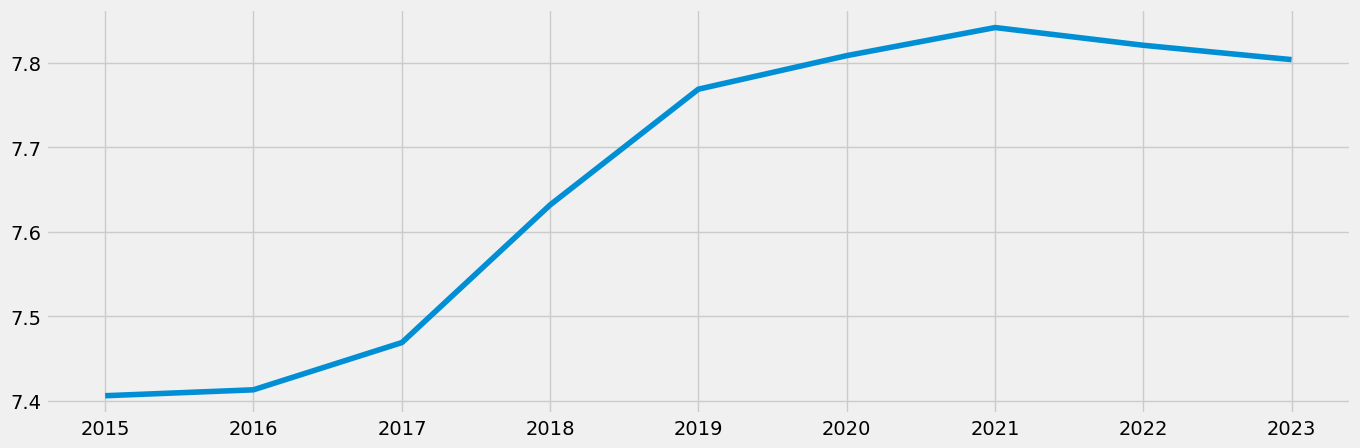

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_fin)

In [16]:
# Check for missing values 

df_sub_fin.isnull().sum() 

happiness_score    0
dtype: int64

In [17]:
# Check for duplicates

dups = df_sub_fin.duplicated()
dups.sum()

# No dups!

0

#### 3. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub_fin, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

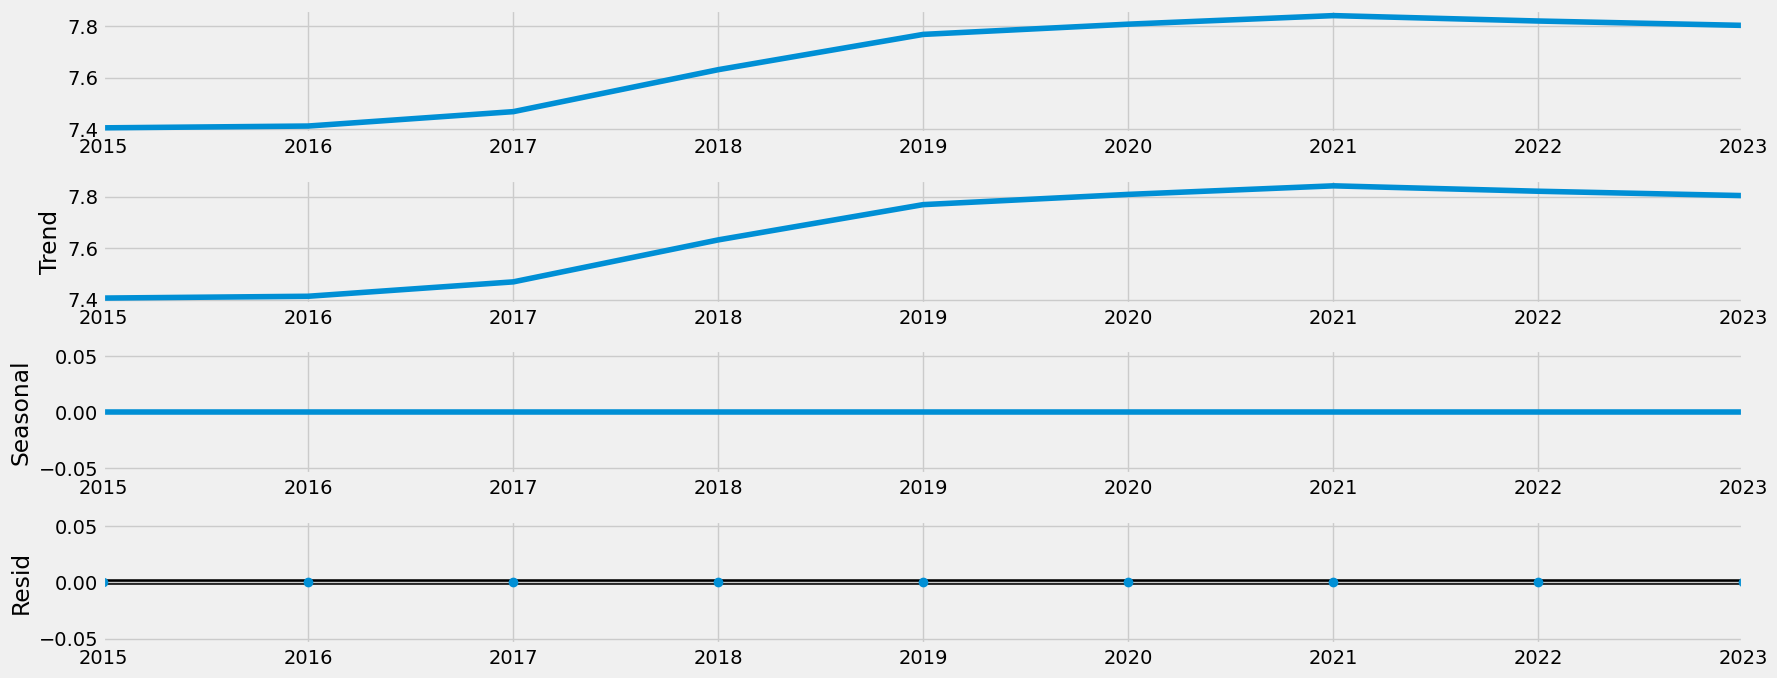

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

#### 4. Testing for stationarity

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why we need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub_fin['happiness_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -2.935645
p-value                        0.041357
Number of Lags Used            1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


The Dickey-Fuller test evaluates the null hypothesis that a unit root is present in a time series, indicating non-stationarity.
- The Test Statistic is -2.935645. While it does not exceed the critical values at the 1% and 5% levels, it does fall below the critical value at the 10% level. This suggests that there is weak evidence to reject the null hypothesis of non-stationarity.
- The p-value is 0.041357, which is close to the 0.05 threshold. This provides some evidence against non-stationarity, but it's not very strong.

    Given that the evidence against non-stationarity is somewhat weak, we can conduct a round of differencing to see if it improves stationarity. 

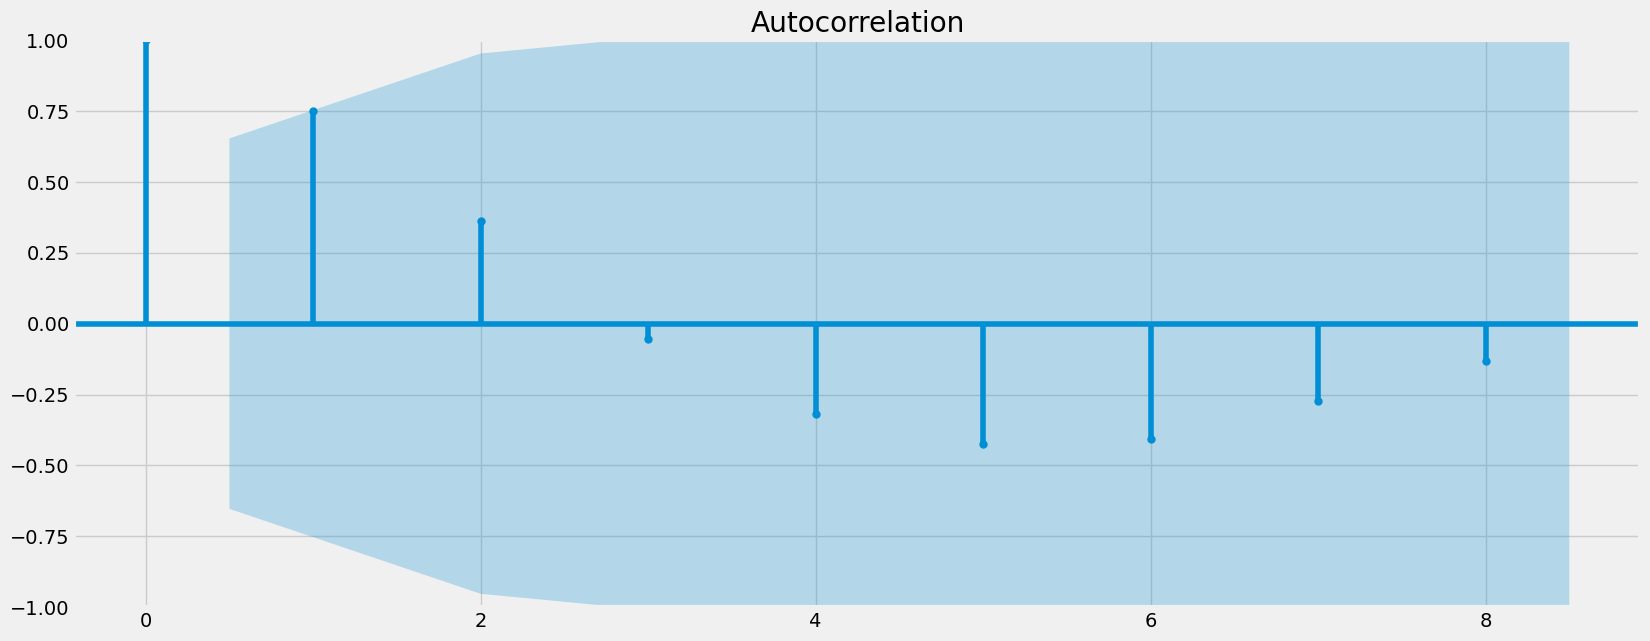

In [23]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, we import the autocorrelation and partial correlation plots

plot_acf(df_sub_fin)
plt.show()

#### 5. Stationarizing the  Data

In [24]:
data_diff_fin = df_sub_fin - df_sub_fin.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [25]:
data_diff_fin.dropna(inplace = True) # Here, we remove the missing values that came about as a result of the differencing. 
# We  need to remove these or we won't be able to run the Dickey-Fuller test.

In [26]:
data_diff_fin.head()

,happiness_score
datetime_year,
2016-01-01,0.0070
2017-01-01,0.0560
2018-01-01,0.1630
2019-01-01,0.1370
2020-01-01,0.0397


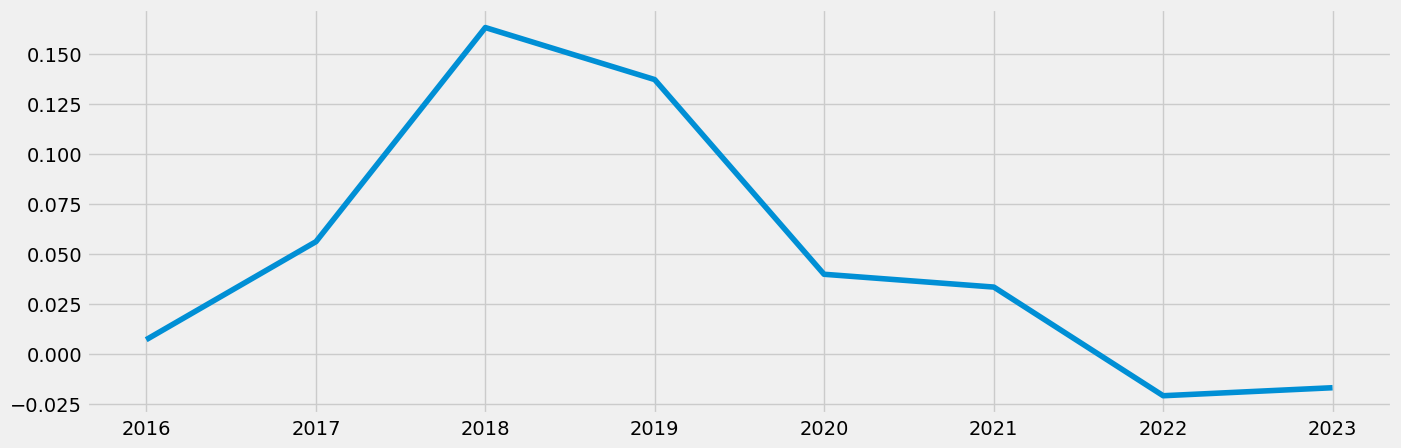

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_fin)

In [28]:
dickey_fuller(data_diff_fin)

Dickey-Fuller Stationarity test:
Test Statistic                -1.105372
p-value                        0.712925
Number of Lags Used            0.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


since the data still isn’t stationary i will perform another round of differencing

In [29]:
data_diff_fin1 = data_diff_fin - data_diff_fin.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [30]:
data_diff_fin1.dropna(inplace = True)

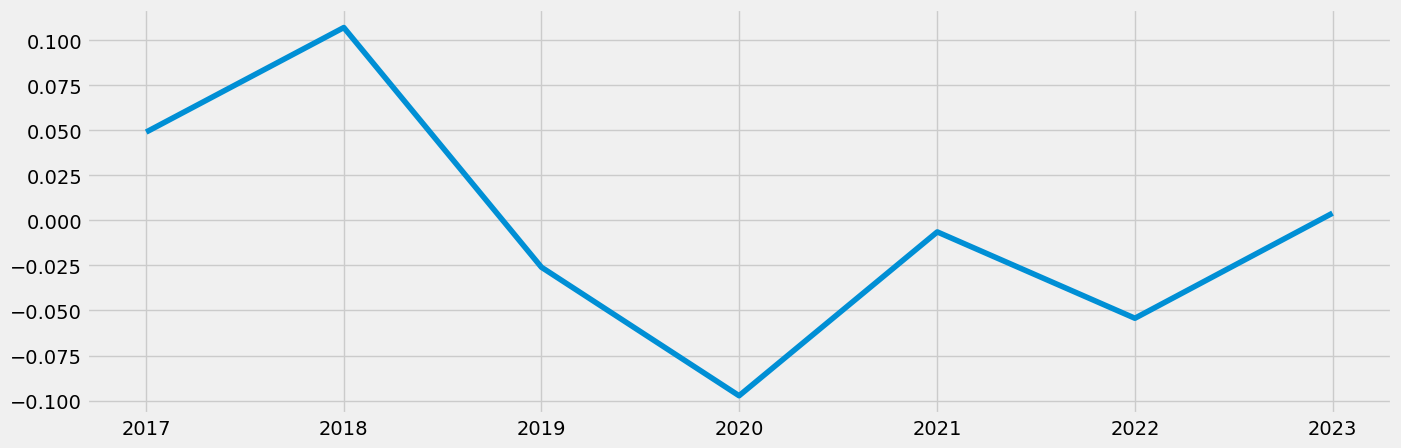

In [31]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_fin1)

In [32]:
dickey_fuller(data_diff_fin1)

Dickey-Fuller Stationarity test:
Test Statistic                -1.740512
p-value                        0.410370
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


The increasing p-values in the differenced series suggest that differencing might not be the most effective method for achieving stationarity in this case.

Based on the results of the first Dickey-Fuller test on the original series and the additional rounds of differencing we can conclude that in our orignal series:

- There is evidence against the null hypothesis of non-stationarity.
- The p-value is below the 0.05 threshold, indicating statistical significance.
- The test statistic is more negative than the critical values at the 10% level.
    
    Therefore, it is reasonable to consider the original series as showing evidence in favor of stationarity. 